# to do list

- L1 VS L2
- logistic regression原理及参数意义
- ~~random forest原理及参数意义~~
- logistic regression所得参数分析
- 交叉验证
- 找并尝试别人的其他方式，提升准确率

# Win10 Kaggle环境配置

## 虚拟环境创建
conda create -n kaggle python=3.6

activate kaggle

## jupyter notebook配置
conda install nb_conda

pip install jupyter_contrib_nbextensions 
jupyter contrib nbextension install --user

pip install jupyter_nbextensions_configurator 
jupyter nbextensions_configurator enable --user

扩展插件配置略

# 进行初步数据分析

## 数据概况

### 数据加载

In [47]:
import pandas as pd #数据分析
# import numpy as np #科学计算
# from pandas import Series, DataFrame #Series, DateFrame是Pandas的两种数据类型，可分别简单理解为一维表格型数据和二维表格型数据

# csv数据读取
data_train = pd.read_csv("./data/train.csv")
type(data_train)
# data_train

pandas.core.frame.DataFrame

In [45]:
#查看数据信息
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#查看统计信息，仅对数值类型数据有效
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 各列信息含义

- PassengerId  乘客ID编号
- Survived    是否获救
- Pclass     客舱等级
- Name       姓名
- Sex       性别
- Age       年龄
- SibSp      同船的兄妹数+配偶数
- Parch      同船父母数+小孩数
- Ticket     船票信息
- Fare       票价
- Cabin      客舱信息（座位信息）
- Embarked    登船港口

## 数据可视化分析

### heat map of correlation

热力图矩阵可以反应数据表中特征间的相关性。

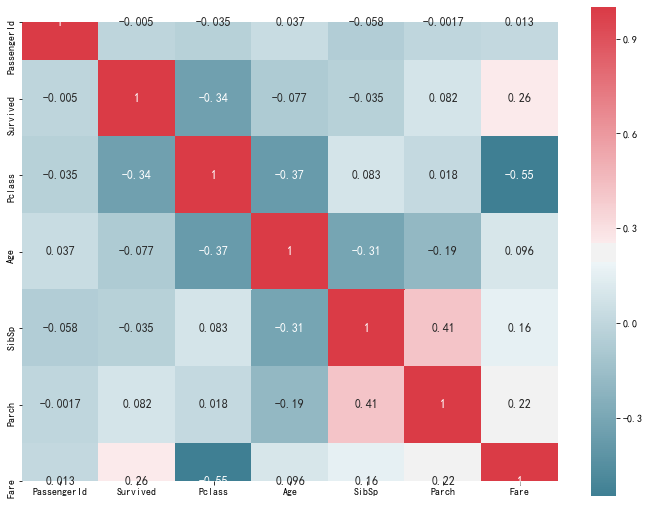

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_map(df):
    corr = df.corr()
    _, ax = plt.subplots(figsize=(12,10))
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })
    
plot_correlation_map(data_train)

由上图可以看出，在原始特征列为数值的项中:
    
- 票价Fare与获救情况具有最大正相关
- 客舱等级Pclass与获救情况具有最大负相关

### 乘客各属性分布分析

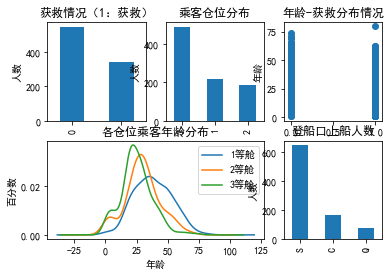

In [52]:
import matplotlib.pyplot as plt

#中文乱码问题解决
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

fig = plt.figure()

plt.subplot2grid((2, 3), (0, 0))
data_train.Survived.value_counts().plot(kind='bar') #'bar'(柱状图)
plt.ylabel("人数")
plt.title("获救情况（1：获救）")

plt.subplot2grid((2, 3), (0, 1))
data_train.Pclass.value_counts().plot(kind='bar')
plt.ylabel("人数")
plt.title("乘客仓位分布")

plt.subplot2grid((2, 3), (0, 2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel("年龄")
plt.title("年龄-获救分布情况")

plt.subplot2grid((2, 3), (1, 0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde') #‘kde’密度图
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel("年龄")
plt.ylabel("百分数")
plt.title("各仓位乘客年龄分布")
plt.legend(("1等舱", "2等舱", "3等舱"), loc='best')

plt.subplot2grid((2, 3), (1, 2))
data_train.Embarked.value_counts().plot(kind="bar")
plt.ylabel("人数")
plt.title("登船口上船人数")

plt.show()

In [7]:
print(type(data_train.Survived.value_counts()))

<class 'pandas.core.series.Series'>


个人认为，这个数量其实对问题本身没多大意义！

### 各仓位乘客获救情况分析

<Figure size 432x288 with 0 Axes>

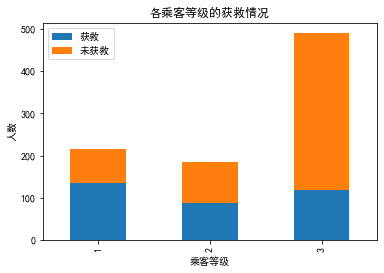

In [8]:
fig = plt.figure()

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df = pd.DataFrame({'获救': Survived_1, '未获救': Survived_0})
df.plot(kind='bar', stacked=True)
plt.xlabel('乘客等级')
plt.ylabel('人数')
plt.title('各乘客等级的获救情况')
plt.show()

In [ ]:
# TO DO: 这里其实不关注绝对数量，可视化获救概率更优

In [76]:
fig = plt.figure()

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
Survived_rate = Survived_1 / (Survived_0+Survived_1)
print(Survived_rate)

# 如何画呢？？？
# Survived_rate.plot()
# plt.show()

1    0.629630
2    0.472826
3    0.242363
Name: Pclass, dtype: float64


<Figure size 432x288 with 0 Axes>

### 性别对获救情况的影响分析

<Figure size 432x288 with 0 Axes>

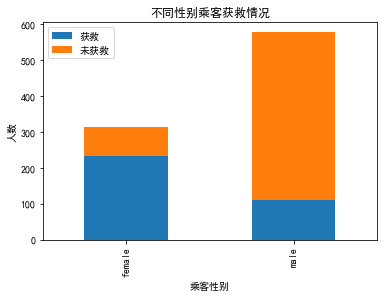

In [9]:
fig = plt.figure()

Survived_0 = data_train.Sex[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Sex[data_train.Survived == 1].value_counts()
df = pd.DataFrame({'获救': Survived_1, '未获救': Survived_0})
df.plot(kind='bar', stacked=True)
plt.xlabel('乘客性别')
plt.ylabel('人数')
plt.title('不同性别乘客获救情况')
plt.show()

### 性别&仓位对获救情况影响的总和分析

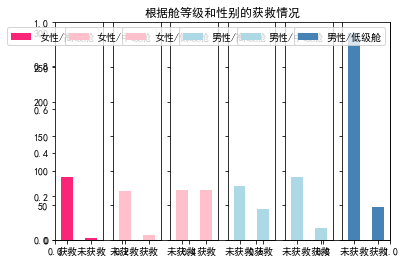

In [10]:
fig = plt.figure()

plt.title(u"根据舱等级和性别的获救情况")

ax1=fig.add_subplot(161)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 1].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"获救", u"未获救"], rotation=0)
ax1.legend([u"女性/高级舱"], loc='best')

ax5=fig.add_subplot(162, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 2].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax5.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"女性/中级舱"], loc='best')

ax2=fig.add_subplot(163, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"女性/低级舱"], loc='best')

ax3=fig.add_subplot(164, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 1].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/高级舱"], loc='best')

ax6=fig.add_subplot(165, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 2].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax6.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/中级舱"], loc='best')

ax4=fig.add_subplot(166, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/低级舱"], loc='best')

plt.show()

### 登船港口对获救情况的影响分析

经济发展程度可能不一致，仓位等级里应该有体现吧

<Figure size 432x288 with 0 Axes>

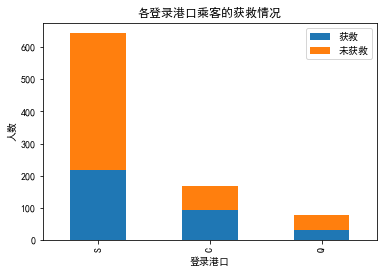

In [53]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各登录港口乘客的获救情况")
plt.xlabel(u"登录港口") 
plt.ylabel(u"人数") 

plt.show()

In [ ]:
# TO DO: 这里其实不关注绝对数量，可视化各登船港口乘客的获救概率更优

### 其他影响分析

In [12]:
g = data_train.groupby(['SibSp','Survived']) # SibSp兄妹数
print(type(g))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [13]:
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

In [14]:
g = data_train.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print(df)

                PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1


In [15]:
print(data_train.Cabin.value_counts())

C23 C25 C27    4
B96 B98        4
G6             4
F2             3
D              3
              ..
D9             1
E36            1
C7             1
F38            1
C82            1
Name: Cabin, Length: 147, dtype: int64


<Figure size 432x288 with 0 Axes>

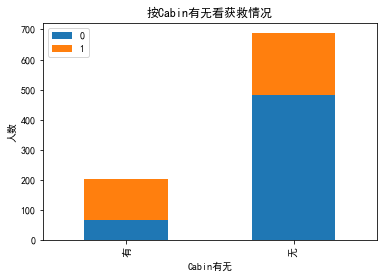

In [16]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"按Cabin有无看获救情况")
plt.xlabel(u"Cabin有无") 
plt.ylabel(u"人数")
plt.show()

# 数据预处理
    
主要包括以下内容：
- 对部分样本中丢失的特征值进行处理
- 非数值特征处理
- 归一化处理等

## 处理缺失值

In [17]:
from sklearn.ensemble import RandomForestRegressor

def set_missing_ages(df):
    age_df = df[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]
    
    known_age = age_df[age_df.Age.notnull()].values
#     print(known_age)
    unknown_age = age_df[age_df.Age.isnull()].values
#     print(unknown_age)
    
    y = known_age[:, 0]
    X = known_age[:, 1:]
    
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    
    predict_age = rfr.predict(unknown_age[:, 1:])
    df.loc[df.Age.isnull(), 'Age'] = predict_age
    
    return df, rfr

def set_cabin_type(df):
    df.loc[df.Cabin.notnull(), 'Cabin'] = 'Yes'
    df.loc[df.Cabin.isnull(), 'Cabin'] = 'No'
    
    return df

# print(data_train.info())
data_train, rfr = set_missing_ages(data_train)
data_train = set_cabin_type(data_train)

In [18]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 对类目型的非数值特征做特征因子化处理

**pd.get_dummies()生成虚拟变量、哑变量、dummy variable**

In [19]:
def features_dummies(df):
    """
    对类目型特征做特征因子化
    """

    dummies_Cabin = pd.get_dummies(df['Cabin'], prefix='Cabin')
    dummies_Embarked = pd.get_dummies(df['Embarked'], prefix='Embarked')
    dummies_Sex = pd.get_dummies(df['Sex'], prefix='Sex')
    dummies_Pclass = pd.get_dummies(df['Pclass'], prefix='Pclass')

    df = pd.concat([df, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
    df.drop(['Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Pclass'], axis=1, inplace=True)

    return df

data_train = features_dummies(data_train)
data_train

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0


## 归一化处理

In [20]:
data_train.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.647248,0.523008,0.381594,32.204208,0.771044,0.228956,0.188552,0.086420,0.722783,0.352413,0.647587,0.242424,0.206510,0.551066
std,257.353842,0.486592,13.629879,1.102743,0.806057,49.693429,0.420397,0.420397,0.391372,0.281141,0.447876,0.477990,0.477990,0.428790,0.405028,0.497665
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,21.000000,0.000000,0.000000,7.910400,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,29.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,36.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


每列特征均值差异太大，将值归一化到[-1, 1]训练速度更快。对于类目特征得到的dummy variable无需做归一化处理。这里对Age&Fare做归一化处理应该就可以了。

In [21]:
import sklearn.preprocessing as preprocessing

scaler = preprocessing.StandardScaler()

age_scale_param = scaler.fit(data_train['Age'].values.reshape(-1, 1))
data_train['Age_scaled'] = scaler.fit_transform(data_train['Age'].values.reshape(-1, 1), age_scale_param)

fare_scale_param = scaler.fit(data_train['Fare'].values.reshape(-1, 1))
data_train['Fare_scaled'] = scaler.fit_transform(data_train['Fare'].values.reshape(-1, 1), fare_scale_param)

data_train

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561380,-0.502445
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613171,0.786845
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267742,-0.488854
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392942,0.420730
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392942,-0.486337
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1,-0.426384,-0.478116
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0,1.787722,0.395814
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1,-2.029569,-0.224083
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1,-0.194333,-0.424256
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0,-1.148655,-0.042956


In [22]:
data_train.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02,8.910000e+02
mean,446.000000,0.383838,29.647248,0.523008,0.381594,32.204208,0.771044,0.228956,0.188552,0.086420,0.722783,0.352413,0.647587,0.242424,0.206510,0.551066,-2.671513e-16,3.987333e-18
std,257.353842,0.486592,13.629879,1.102743,0.806057,49.693429,0.420397,0.420397,0.391372,0.281141,0.447876,0.477990,0.477990,0.428790,0.405028,0.497665,1.000562e+00,1.000562e+00
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.145556e+00,-6.484217e-01
25%,223.500000,0.000000,21.000000,0.000000,0.000000,7.910400,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.347895e-01,-4.891482e-01
50%,446.000000,0.000000,29.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-4.751409e-02,-3.573909e-01
75%,668.500000,1.000000,36.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,4.663519e-01,-2.424635e-02
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.696367e+00,9.667167e+00


In [23]:
#特征选择，得到最终的训练数据
train_df = data_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_df

,Survived,SibSp,Parch,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,0,1,0,1,0,0,0,1,0,1,0,0,1,-0.561380,-0.502445
1,1,1,0,0,1,1,0,0,1,0,1,0,0,0.613171,0.786845
2,1,0,0,1,0,0,0,1,1,0,0,0,1,-0.267742,-0.488854
3,1,1,0,0,1,0,0,1,1,0,1,0,0,0.392942,0.420730
4,0,0,0,1,0,0,0,1,0,1,0,0,1,0.392942,-0.486337
5,0,0,0,1,0,0,1,0,0,1,0,0,1,-0.426384,-0.478116
6,0,0,0,0,1,0,0,1,0,1,1,0,0,1.787722,0.395814
7,0,3,1,1,0,0,0,1,0,1,0,0,1,-2.029569,-0.224083
8,1,0,2,1,0,0,0,1,1,0,0,0,1,-0.194333,-0.424256
9,1,1,0,1,0,1,0,0,1,0,0,1,0,-1.148655,-0.042956


In [24]:
train_np = train_df.values
train_np

array([[ 0.        ,  1.        ,  0.        , ...,  1.        ,
        -0.56138008, -0.50244517],
       [ 1.        ,  1.        ,  0.        , ...,  0.        ,
         0.61317075,  0.78684529],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.26774237, -0.48885426],
       ...,
       [ 0.        ,  1.        ,  2.        , ...,  1.        ,
        -0.98759887, -0.17626324],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.26774237, -0.04438104],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.17271419, -0.49237783]])

# Logistic Regression

## 训练

In [37]:
from sklearn import linear_model

X = train_np[:, 1:]
y = train_np[:, 0]

classfier = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6, solver='liblinear') # why l1 norm
classfier.fit(X, y)

classfier.__dict__

{'penalty': 'l1',
 'dual': False,
 'tol': 1e-06,
 'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': None,
 'solver': 'liblinear',
 'max_iter': 100,
 'multi_class': 'warn',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None,
 'classes_': array([0., 1.]),
 'coef_': array([[-0.34423582, -0.10491599,  0.        ,  0.90210839,  0.        ,
          0.        , -0.41726233,  1.9565695 , -0.67742248,  0.34116061,
          0.        , -1.1941301 , -0.52376668,  0.08443491]]),
 'intercept_': array([0.]),
 'n_iter_': array([25], dtype=int32)}

## 测试

### 测试数据预处理

In [26]:
data_test = pd.read_csv('./data/test.csv')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [27]:
data_test.loc[data_test.Fare.isnull(), 'Fare'] = 0

#Age缺失值填充
tmp_df = data_test[ ['Age', 'Fare', 'Parch', 'SibSp', 'Pclass'] ]
null_age = tmp_df[data_test.Age.isnull()].values
X=null_age[:, 1:]
predict_age = rfr.predict(X)
data_test.loc[data_test.Age.isnull(), 'Age'] = predict_age

data_test = set_cabin_type(data_test)

data_test = features_dummies(data_test)

#归一化
data_test['Age_scaled'] = scaler.fit_transform(data_test['Age'].values.reshape(-1, 1), age_scale_param)
data_test['Fare_scaled'] = scaler.fit_transform(data_test['Fare'].values.reshape(-1, 1), fare_scale_param)
data_test

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.500000,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307521,-0.496637
1,893,47.000000,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256241,-0.511497
2,894,62.000000,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394706,-0.463335
3,895,27.000000,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261711,-0.481704
4,896,22.000000,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641199,-0.416740
5,897,14.000000,0,0,9.2250,1,0,0,0,1,0,1,0,0,1,-1.248380,-0.471623
6,898,30.000000,0,0,7.6292,1,0,0,1,0,1,0,0,0,1,-0.034018,-0.500221
7,899,26.000000,1,1,29.0000,1,0,0,0,1,0,1,0,1,0,-0.337609,-0.117238
8,900,18.000000,0,0,7.2292,1,0,1,0,0,1,0,0,0,1,-0.944790,-0.507390
9,901,21.000000,2,0,24.1500,1,0,0,0,1,0,1,0,0,1,-0.717097,-0.204154


In [28]:
test_df = data_test.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
test_np = test_df.values

### test

In [29]:
predict = classfier.predict(test_np)
print(type(predict))
result = pd.DataFrame({'PassengerId': data_test['PassengerId'].values, 'Survived': predict.astype(np.int32)})
result.to_csv("logistic_regression_preditions.csv")
result

<class 'numpy.ndarray'>


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


### 模型参数查看&分析

In [30]:
pd.DataFrame({'columns': list(train_df.columns)[1:], 'coef': list(classfier.coef_.T)})

,columns,coef
0,SibSp,[-0.344235595763827]
1,Parch,[-0.10491580612174183]
2,Cabin_No,[0.0]
3,Cabin_Yes,[0.9021082323808474]
4,Embarked_C,[0.0]
5,Embarked_Q,[0.0]
6,Embarked_S,[-0.41726230626981253]
7,Sex_female,[1.956569269141609]
8,Sex_male,[-0.6774226556527703]
9,Pclass_1,[0.34115961573030634]


**分析**

- Sex属性对获救影响最明显
- 系数大于0正相关，小于0负相关
- Age年龄越小获救概率越大，老人呢？
- Cabin值有无对获救概率影响明显，是什么原因呢？
- ...


# K折交叉验证

In [42]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression

X = train_np[:, 1:]
y = train_np[:, 0]
model = LogisticRegression(C=1.0, penalty='l1', tol=1e-6, solver='liblinear')
# accuracy = cross_val_score(model, X, y, cv=10)
# accuracy

cross_validate(model, X, y, cv=10)

{'fit_time': array([0.00299144, 0.00299191, 0.00302649, 0.00299287, 0.00398922,
        0.00302744, 0.00295663, 0.00299215, 0.00302672, 0.00304008]),
 'score_time': array([0.        , 0.00099659, 0.00096273, 0.        , 0.        ,
        0.        , 0.00099754, 0.        , 0.00096226, 0.        ]),
 'test_score': array([0.82222222, 0.81111111, 0.78651685, 0.84269663, 0.80898876,
        0.76404494, 0.78651685, 0.79775281, 0.80898876, 0.81818182])}

In [43]:
# pd.DataFrame({'columns': list(train_df.columns)[1:], 'coef': list(model.coef_.T)})
model.__dict__

{'penalty': 'l1',
 'dual': False,
 'tol': 1e-06,
 'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': None,
 'solver': 'liblinear',
 'max_iter': 100,
 'multi_class': 'warn',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None}

# 参考资料

- [An Interactive Data Science Tutorial](https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial#1.-Business-Understanding)
- [机器学习系列(3)_逻辑回归应用之Kaggle泰坦尼克之灾](https://blog.csdn.net/han_xiaoyang/article/details/49797143)